In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("./Dataset/train.csv")
df.reset_index(inplace=True)
# df = pd.read_csv("./Dataset/test.csv")

In [16]:
df.head(n=100)

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2023-04,yishun,741,Yishun Avenue 5,4-room,new generation,93.0,yes,1985,1.430100,103.833118,0.0,yishun west,yishun,north region,3700
96,96,2021-03,sengkang,131,rivervale street,4 room,model a2,90.0,yes,1999,1.389344,103.903082,0.0,rivervale,sengkang,north-east region,2500
97,97,2021-06,woodlands,556,Woodlands Drive 53,5 room,improved,120.0,yes,1999,1.432928,103.796013,0.0,woodlands south,woodlands,north region,1750
98,98,2021-06,bedok,59,chai chee road,3 room,model a,76.0,yes,1984,1.324889,103.920247,0.0,kembangan,bedok,east region,2000


EDA

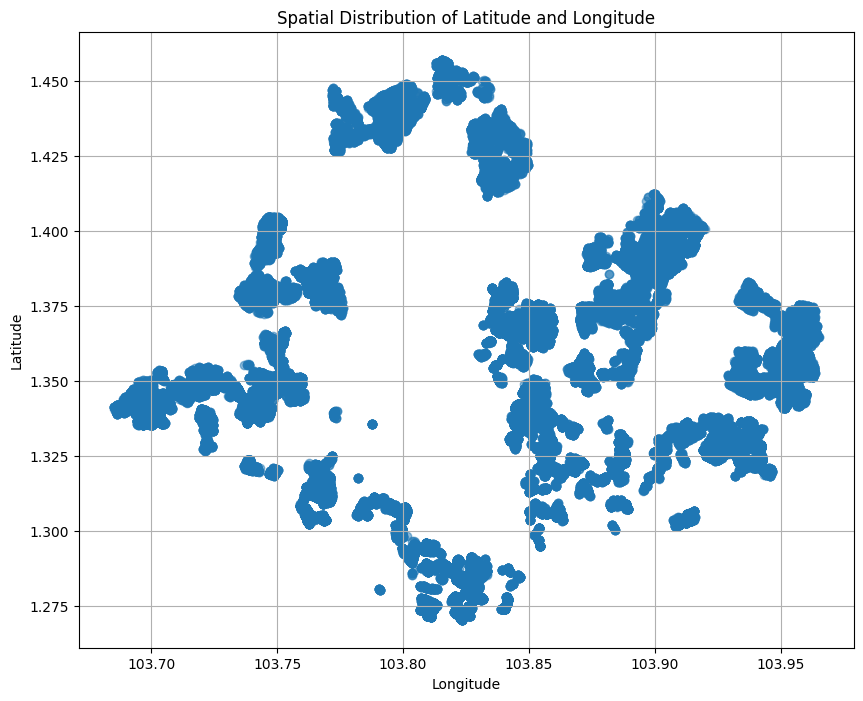

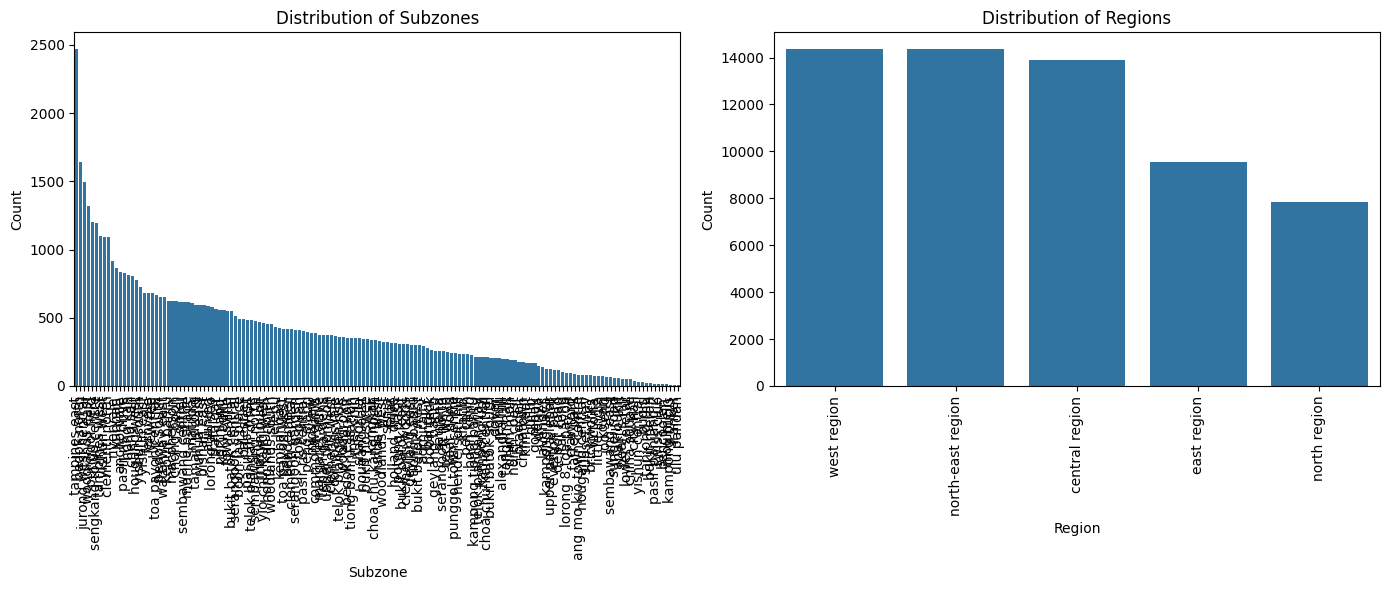

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.title('Spatial Distribution of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot bar plots for subzone and region
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='subzone', order=df['subzone'].value_counts().index)
plt.title('Distribution of Subzones')
plt.xlabel('Subzone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='region', order=df['region'].value_counts().index)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Data Preprocessing

In [18]:
# deal with columns from latitude
# Round the "latitude" and "longitude" columns to 6 decimal places
df['latitude'] = df['latitude'].round(6)
df['longitude'] = df['longitude'].round(6)
# Remove rows with NaN values in 'latitude' or 'longitude' because both of them are crucial
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Fill in NaH values in "region" referring other rows with similar latitude&longitude values 
# Step 1: Create a dictionary to map latitude and longitude pairs to "region" values
region_mapping = df.dropna(subset=['region']).groupby(['latitude', 'longitude'])['region'].first().to_dict()
# Step 2: Fill in NaN values in "region" using the mapping
df['region'] = df.apply(lambda row: region_mapping.get((row['latitude'], row['longitude']), row['region']), axis=1)
# Remove the left rows with NaN values in 'region'
df.dropna(subset=['region'], inplace=True)

# Fill in NaH values in "subzone" referring other rows with similar latitude&longitude values 
# Step 1: Create a dictionary to map latitude and longitude pairs to "subzone" values
subzone_mapping = df.dropna(subset=['subzone']).groupby(['latitude', 'longitude'])['subzone'].first().to_dict()
# Step 2: Fill in NaN values in "subzone" using the mapping
df['subzone'] = df.apply(lambda row: subzone_mapping.get((row['latitude'], row['longitude']), row['subzone']), axis=1)

# Perform label encoding for "subzone" and "region"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['subzone_encoded'] = label_encoder.fit_transform(df['subzone'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])


# drop "elevation" and "planning_area" due to meaningless values and repetition 
df.drop(columns=['elevation', 'planning_area'], inplace=True)
df.head(n=100)

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,subzone,region,monthly_rent,subzone_encoded,region_encoded
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,yuhua east,west region,1600,149,4
1,1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,bedok north,east region,2250,8,1
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,toa payoh central,central region,1900,128,0
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,pasir ris drive,east region,2850,91,1
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,bendemeer,central region,2100,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2023-04,yishun,741,Yishun Avenue 5,4-room,new generation,93.0,yes,1985,1.430100,103.833118,yishun west,north region,3700,148,2
96,96,2021-03,sengkang,131,rivervale street,4 room,model a2,90.0,yes,1999,1.389344,103.903082,rivervale,north-east region,2500,100,3
97,97,2021-06,woodlands,556,Woodlands Drive 53,5 room,improved,120.0,yes,1999,1.432928,103.796013,woodlands south,north region,1750,141,2
98,98,2021-06,bedok,59,chai chee road,3 room,model a,76.0,yes,1984,1.324889,103.920247,kembangan,east region,2000,70,1


In [19]:
df.loc[:, "region"] = df["region_encoded"]
df.loc[:, "subzone"] = df['subzone_encoded']

In [20]:
# df[['latitude', 'longitude','subzone','region',	'subzone_encoded',	'region_encoded']].to_csv("./preprocessed/test_3.csv")
df[['index', 'latitude', 'longitude','subzone','region', 'monthly_rent']].to_csv("./preprocessed/train_3.csv", index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                60000 non-null  int64  
 1   rent_approval_date   60000 non-null  object 
 2   town                 60000 non-null  object 
 3   block                60000 non-null  object 
 4   street_name          60000 non-null  object 
 5   flat_type            60000 non-null  object 
 6   flat_model           60000 non-null  object 
 7   floor_area_sqm       60000 non-null  float64
 8   furnished            60000 non-null  object 
 9   lease_commence_date  60000 non-null  int64  
 10  latitude             60000 non-null  float64
 11  longitude            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  region               60000 non-null  object 
 14  monthly_rent         60000 non-null  int64  
 15  subzone_encoded      60000 non-null 

In [11]:
os.listdir("./Dataset/auxiliary-data/")

['sg-primary-schools.csv',
 'sg-shopping-malls.csv',
 'sg-mrt-existing-stations.csv',
 'sg-mrt-planned-stations.csv',
 'sg-coe-prices.csv',
 'sg-stock-prices.csv']

In [ ]:
def display_df(dir_path="./Dataset/auxiliary-data/"):
    files = os.listdir(dir_path)
    for file in files:
        df = pd.read_csv(dir_path + file)
        print(file)
        display(df.head())
    # cp = pd.read_csv("./Dataset/auxiliary-data/sg-shopping-malls.csv")

In [21]:
display_df()

sg-primary-schools.csv


,name,latitude,longitude
0,Admiralty Primary School,1.454038,103.817436
1,Ahmad Ibrahim Primary School,1.433153,103.832942
2,Ai Tong School,1.360583,103.833020
3,Alexandra Primary School,1.291334,103.824425
4,Anchor Green Primary School,1.390370,103.887165


sg-shopping-malls.csv


,name,latitude,longitude
0,100 AM,1.274588,103.843471
1,313@Somerset,1.301385,103.837684
2,Aperia,1.310867,103.863930
3,Balestier Hill Shopping Centre,1.325596,103.842572
4,Bugis Cube,1.298141,103.855635


sg-mrt-existing-stations.csv


,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


sg-mrt-planned-stations.csv


,code,name,opening_year,latitude,longitude
0,NaN,Brickland,2030,1.369700,103.747900
1,NaN,Sungei Kadut,2030,1.413300,103.748800
2,NaN,Punggol Coast,2024,1.415280,103.911110
3,NaN,Bukit Brown,TBA,1.333639,103.830075
4,NaN,Keppel,2026,1.270100,103.831000


sg-coe-prices.csv


,year,category,month,bidding,price,quota,bids
0,2023,a,july,2,95202,581,728
1,2023,a,july,1,97000,588,756
2,2023,a,june,2,96206,586,751
3,2023,a,june,1,98001,581,881
4,2023,a,may,2,92000,596,936


sg-stock-prices.csv


,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707


In [22]:
coe_price = pd.read_csv("./Dataset/auxiliary-data/sg-coe-prices.csv")

In [24]:
coe_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      248 non-null    int64 
 1   category  248 non-null    object
 2   month     248 non-null    object
 3   bidding   248 non-null    int64 
 4   price     248 non-null    int64 
 5   quota     248 non-null    int64 
 6   bids      248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB
